### DATA MINING 
DIGITAL ASSIGNMENT-2
HARSH AGRAWAL 22BDS0078

### Installing Required Libraries
We will use the following Python libraries for our project:
- `pandas`: For handling data
- `mlxtend`: For frequent itemset mining and association rule generation
- `matplotlib`: For visualizing frequent itemsets

If any of these packages are not installed, use the following command:


### Creating a Grocery Transactions Dataset
We will generate a dataset of 100 transactions using 10 grocery items:
- Items: Milk, Bread, Butter, Eggs, Cheese, Juice, Rice, Pasta, Coffee, Chocolate.
- Each transaction will contain a random selection of 2 to 5 items.


In [11]:
import pandas as pd
import random

# List of available items
items = ['Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Juice', 'Rice', 'Pasta', 'Coffee', 'Chocolate']

# Create 100 random transactions
transactions = []

# Generating random transactions
for _ in range(100):  # Loop to generate 100 transactions
    transaction = random.sample(items, random.randint(2, 5))  # Randomly select 2 to 5 items per transaction
    transactions.append(transaction)  # Append transaction to the list

# Display first 5 transactions for verification
print("Sample Transactions:\n", transactions[:5])


Sample Transactions:
 [['Juice', 'Rice', 'Chocolate', 'Pasta', 'Butter'], ['Milk', 'Rice', 'Pasta', 'Bread'], ['Coffee', 'Eggs', 'Bread', 'Milk', 'Cheese'], ['Bread', 'Butter', 'Eggs'], ['Rice', 'Chocolate', 'Bread', 'Butter', 'Milk']]


### Converting Transactions into a One-Hot Encoded Format
Since Apriori and FP-Growth require numerical input, we will use `TransactionEncoder()` from `mlxtend` to convert our list of transactions into a DataFrame with binary values (0s and 1s).


In [12]:
from mlxtend.preprocessing import TransactionEncoder

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)  # One-hot encode transactions
df = pd.DataFrame(te_ary, columns=te.columns_)  # Convert to DataFrame

print("\nOne-hot encoded transactions (first 5 rows):\n", df.head())  # Display first 5 rows



One-hot encoded transactions (first 5 rows):
    Bread  Butter  Cheese  Chocolate  Coffee   Eggs  Juice   Milk  Pasta   Rice
0  False    True   False       True   False  False   True  False   True   True
1   True   False   False      False   False  False  False   True   True   True
2   True   False    True      False    True   True  False   True  False  False
3   True    True   False      False   False   True  False  False  False  False
4   True    True   False       True   False  False  False   True  False   True


### Applying the Apriori Algorithm
We will use `apriori()` from `mlxtend.frequent_patterns` to identify frequent itemsets.
- We will experiment with three different minimum support values: **0.1, 0.15, and 0.2**.
- We will then generate association rules with corresponding confidence thresholds: **0.5, 0.6, and 0.7**.


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

# ---------------------- First Threshold ---------------------- #
print("\n--- Apriori | Support=0.1 ---")
frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)  # min_support=0.1
print(frequent_itemsets1)

rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)  # min_confidence=0.5
print("\nRules (Support=0.1, Confidence=0.5):\n", rules1)

# ---------------------- Second Threshold ---------------------- #
print("\n--- Apriori | Support=0.15 ---")
frequent_itemsets2 = apriori(df, min_support=0.15, use_colnames=True)  # min_support=0.15
print(frequent_itemsets2)

rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6)  # min_confidence=0.6
print("\nRules (Support=0.15, Confidence=0.6):\n", rules2)

# ---------------------- Third Threshold ---------------------- #
print("\n--- Apriori | Support=0.2 ---")
frequent_itemsets3 = apriori(df, min_support=0.2, use_colnames=True)  # min_support=0.2
print(frequent_itemsets3)

rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.7)  # min_confidence=0.7
print("\nRules (Support=0.2, Confidence=0.7):\n", rules3)



--- Apriori | Support=0.1 ---
    support             itemsets
0      0.32              (Bread)
1      0.41             (Butter)
2      0.26             (Cheese)
3      0.43          (Chocolate)
4      0.35             (Coffee)
5      0.43               (Eggs)
6      0.33              (Juice)
7      0.32               (Milk)
8      0.30              (Pasta)
9      0.35               (Rice)
10     0.13      (Bread, Butter)
11     0.17   (Bread, Chocolate)
12     0.13      (Bread, Coffee)
13     0.12        (Bread, Eggs)
14     0.11        (Bread, Milk)
15     0.10       (Pasta, Bread)
16     0.11     (Butter, Cheese)
17     0.20  (Butter, Chocolate)
18     0.16     (Coffee, Butter)
19     0.16       (Butter, Eggs)
20     0.12      (Butter, Juice)
21     0.10      (Pasta, Butter)
22     0.13       (Rice, Butter)
23     0.11  (Cheese, Chocolate)
24     0.10      (Cheese, Juice)
25     0.10      (Pasta, Cheese)
26     0.19  (Coffee, Chocolate)
27     0.17    (Eggs, Chocolate)
28     0.12 

### Applying the FP-Growth Algorithm
FP-Growth is a faster alternative to Apriori for mining frequent itemsets.
- Similar to Apriori, we will test it with three different support values: **0.1, 0.15, and 0.2**.
- We will generate association rules using corresponding confidence thresholds: **0.5, 0.6, and 0.7**.


In [14]:
from mlxtend.frequent_patterns import fpgrowth

# ---------------------- First Threshold ---------------------- #
print("\n--- FP-Growth | Support=0.1 ---")
fp_itemsets1 = fpgrowth(df, min_support=0.1, use_colnames=True)
print(fp_itemsets1)

fp_rules1 = association_rules(fp_itemsets1, metric="confidence", min_threshold=0.5)
print("\nRules (Support=0.1, Confidence=0.5):\n", fp_rules1)

# ---------------------- Second Threshold ---------------------- #
print("\n--- FP-Growth | Support=0.15 ---")
fp_itemsets2 = fpgrowth(df, min_support=0.15, use_colnames=True)
print(fp_itemsets2)

fp_rules2 = association_rules(fp_itemsets2, metric="confidence", min_threshold=0.6)
print("\nRules (Support=0.15, Confidence=0.6):\n", fp_rules2)

# ---------------------- Third Threshold ---------------------- #
print("\n--- FP-Growth | Support=0.2 ---")
fp_itemsets3 = fpgrowth(df, min_support=0.2, use_colnames=True)
print(fp_itemsets3)

fp_rules3 = association_rules(fp_itemsets3, metric="confidence", min_threshold=0.7)
print("\nRules (Support=0.2, Confidence=0.7):\n", fp_rules3)



--- FP-Growth | Support=0.1 ---
    support             itemsets
0      0.43          (Chocolate)
1      0.41             (Butter)
2      0.35               (Rice)
3      0.33              (Juice)
4      0.30              (Pasta)
5      0.32              (Bread)
6      0.32               (Milk)
7      0.43               (Eggs)
8      0.35             (Coffee)
9      0.26             (Cheese)
10     0.20  (Butter, Chocolate)
11     0.16       (Butter, Eggs)
12     0.14    (Rice, Chocolate)
13     0.13       (Rice, Butter)
14     0.14         (Rice, Eggs)
15     0.15        (Rice, Juice)
16     0.12      (Butter, Juice)
17     0.12   (Juice, Chocolate)
18     0.12        (Eggs, Juice)
19     0.11      (Coffee, Juice)
20     0.12   (Pasta, Chocolate)
21     0.10      (Pasta, Butter)
22     0.10       (Pasta, Bread)
23     0.10        (Pasta, Eggs)
24     0.13      (Bread, Coffee)
25     0.12        (Bread, Eggs)
26     0.13      (Bread, Butter)
27     0.17   (Bread, Chocolate)
28     0.1

### Visualizing Frequent Itemsets
To better understand our frequent itemsets, we will visualize their support values using a bar chart.


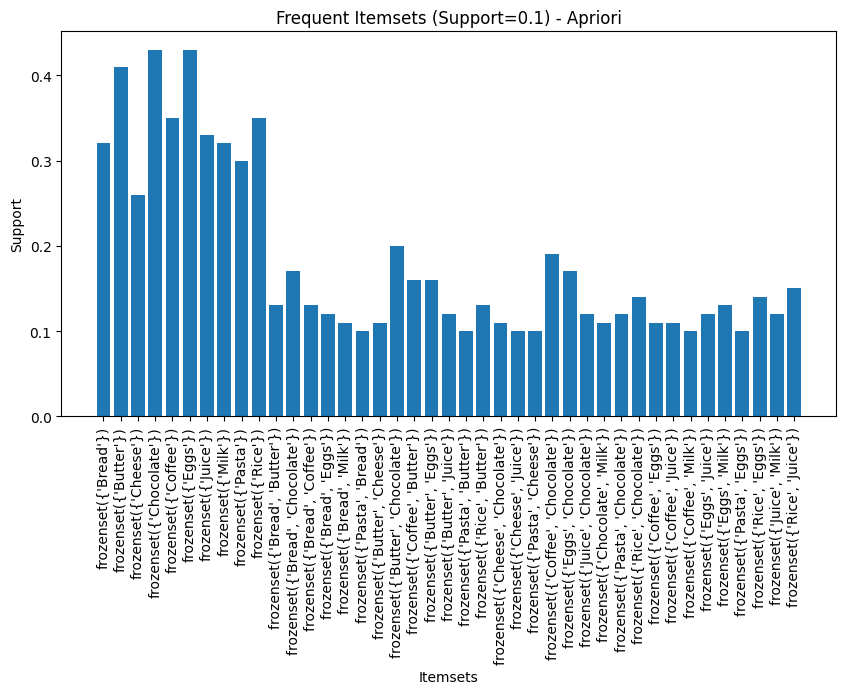

In [16]:
import matplotlib.pyplot as plt

# Frequent Itemsets Visualization
plt.figure(figsize=(10,5))
plt.bar(frequent_itemsets1['itemsets'].astype(str), frequent_itemsets1['support'])
plt.title("Frequent Itemsets (Support=0.1) - Apriori")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.xticks(rotation=90)
plt.show()



### Displaying Association Rules
We will format and display the association rules generated by the Apriori algorithm in a readable tabular format.


In [17]:
# Rules Visualization
print("\nAssociation Rules Table (Support=0.1, Confidence=0.5):\n")
print(rules1[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())


Association Rules Table (Support=0.1, Confidence=0.5):

  antecedents  consequents  support  confidence      lift
1    (Coffee)  (Chocolate)     0.19    0.542857  1.262458
0     (Bread)  (Chocolate)     0.17    0.531250  1.235465
